## Problem Statement:

### Business Case
In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.

 

A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

 

Consider yourself working for an associate at an investment firm that manages accounts for private clients. Your role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement. Let us hear more about it from Joydeep as he introduces you to the entire case.

### The image below summarises the profile of the two investors:

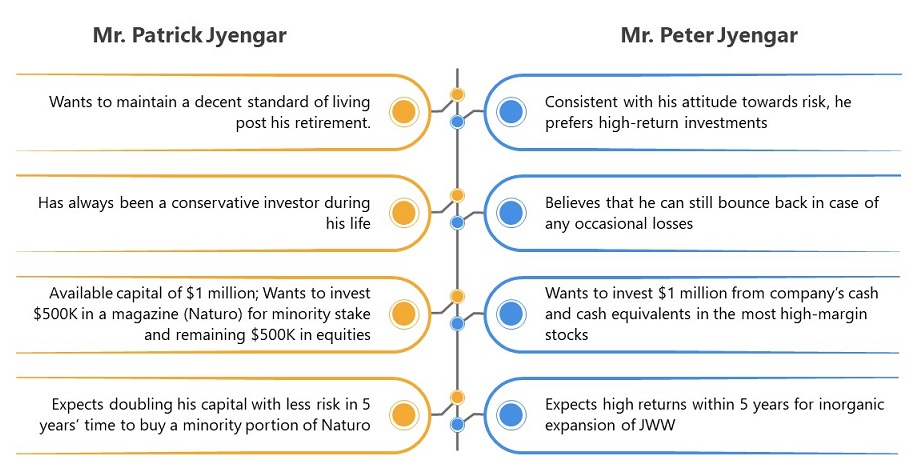

### Data Information

###  Following is information for 24 stocks of leading companies listed in New York Stock Exchange(NYSE):
- Date
- Open price: Price of stock at the start of the day
- Close price: Price of stock at the end of the day
- High price: Highest price reached by the stock on that day
- Low price: Lowest price reached by the stock on that day
- Adjusted close price: Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders
- Volume traded: Number of stocks traded on the day
- The information for every stock ranges from 1st October 2010 to 30th September 2020.
- 
#### The stocks belong to different domains:
- Technology/IT
- Travel/Aviation/Hospitality
- Banking/Financial Services and Insurance
- Pharmaceuticals/Healthcare/Life Sciences

In [63]:
#Importing required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Utilising full display

from IPython.display import display, HTML
display(HTML("<style>.container { width:110% !important; }</style>"))


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

#setting the jupyter view:

pd.options.display.max_columns = None
pd.options.display.max_rows = 10


# Funtion to check data info(shape, size, head)

def dekho(df,n=2, sample = False):
    '''To check shape and first n rows of dataframe - 
    just for visualizing first few rows and shape/size of data (No significance in code) '''
    print(df.shape, end=',\t')
    print([name for name in globals() if globals()[name] is df])
    display(df.sample(n))      if sample==True       else        display(df.head(n))


### Importing the datasets

In [171]:
#importing the datasets

annexure = pd.read_csv("Annexure-I.csv").dropna()

# aviation stocks dataset
american_airlines = pd.read_csv("AAL.csv").dropna()
american_airlines['Ticker'] = 'AAL'

allegiant_travel = pd.read_csv("ALGT.csv").dropna()
allegiant_travel['Ticker'] = 'ALGT'

alaska_air = pd.read_csv("ALk.csv").dropna()
alaska_air['Ticker'] = 'ALk'

delta_airlines = pd.read_csv("DAL.csv").dropna()
delta_airlines['Ticker'] = 'DAL'

hawaiian_holdings = pd.read_csv("HA.csv").dropna()
hawaiian_holdings['Ticker'] = 'HA'

southwest_airlines = pd.read_csv("LUV.csv").dropna()
southwest_airlines['Ticker'] = 'LUV'

# finance stocks dataset
barclays = pd.read_csv("BCS.csv").dropna()
barclays['Ticker'] = 'BCS'

credit_suisse = pd.read_csv("CS.csv").dropna()
credit_suisse['Ticker'] = 'CS'

deutsche_bank = pd.read_csv("DB.csv").dropna()
deutsche_bank['Ticker'] = 'DB'

goldman_sachs = pd.read_csv("GS.csv").dropna()
goldman_sachs['Ticker'] = 'GS'

morgan_stanley = pd.read_csv("MS.csv").dropna()
morgan_stanley['Ticker'] = 'MS'

wells_fargo = pd.read_csv("WFC.csv").dropna()
wells_fargo['Ticker'] = 'WFC'

# healthcare stocks dataset
johnson_and_johnson = pd.read_csv("JNJ.csv").dropna()
johnson_and_johnson['Ticker'] = 'JNJ'

merck_and_co = pd.read_csv("MRK.csv").dropna()
merck_and_co['Ticker'] = 'MRK'

pfizer = pd.read_csv("PFE.csv").dropna()
pfizer['Ticker'] = 'PFE'

unitedhealthgroup = pd.read_csv("UNH.csv").dropna()
unitedhealthgroup['Ticker'] = 'UNH'

# pharmaceutical stocks dataset
bausch_health = pd.read_csv("BHC.csv").dropna()
bausch_health['Ticker'] = 'BHC'

roche_holding = pd.read_csv("RHHBY.csv").dropna()
roche_holding['Ticker'] = 'RHHBY'

# technology stocks dataset
apple = pd.read_csv("AAPL.csv").dropna()
apple['Ticker'] = 'AAPL'

amazon = pd.read_csv("AMZN.csv").dropna()
amazon['Ticker'] = 'AMZN'

facebook = pd.read_csv("FB.csv").dropna()
facebook['Ticker'] = 'FB'

alphabet = pd.read_csv("GOOG.csv").dropna()
alphabet['Ticker'] = 'GOOG'

ibm = pd.read_csv("IBM.csv").dropna()
ibm['Ticker'] = 'IBM'

microsoft = pd.read_csv("MSFT.csv").dropna()
microsoft['Ticker'] = 'MSFT'

# s&p500 index
sp500 = pd.read_csv("S&P500.csv").dropna()
sp500['Ticker'] = 'S&P500'


In [72]:
# concatenating all datasets into one
all_data = pd.concat([american_airlines, allegiant_travel, alaska_air, delta_airlines, hawaiian_holdings, southwest_airlines,
                      barclays, credit_suisse, deutsche_bank, goldman_sachs, morgan_stanley, wells_fargo,
                      johnson_and_johnson, merck_and_co, pfizer, unitedhealthgroup,
                      bausch_health, roche_holding,
                      apple, amazon, facebook, alphabet, ibm, microsoft, sp500], ignore_index=True)

# displaying the concatenated dataframe
dekho(all_data)

(63642, 8),	['stocks']


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800.0,AAL
1,04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800.0,AAL


In [78]:
# Merging all stocks data with annexure to get Industry and company name. 

stocks = pd.merge(all_data,annexure,on='Ticker',how ='left')

## 1. Understanding the Data

In [159]:
# Checking shape:

stocks.shape

(63642, 10)

In [91]:
# Checking null values:

stocks.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Ticker             0
Industry        7551
Company Name    7551
dtype: int64

In [92]:
stocks[stocks['Industry'].isna()]['Ticker'].unique()  # Below are the reasons for the null values

array(['ALk', 'UNH', 'S&P500'], dtype=object)

##### There are 7551 null present in Industry and company name because for following reasons:
###### 1. Ticker name mistake ALk wich should be ALK.
###### 2. There is extra space in "UNH " which should be "UNH".
###### 3. Industry type of S&P500 is not available so replacing NA in ndustry & Company Name.



In [116]:
all_data['Ticker'] = all_data['Ticker'].replace({'ALk':'ALK'})
all_data['Ticker'] = all_data['Ticker'].replace({'UNH ':'UNH'})
annexure['Ticker'] = annexure['Ticker'].replace({'UNH ':'UNH'})

In [145]:
stocks                   = pd.merge(all_data,annexure,on='Ticker',how ='left')
stocks['Industry']       = stocks['Industry'].fillna('S&P500')
stocks['Company Name']   = stocks['Company Name'].fillna('S&P500')

In [146]:
stocks.isnull().sum()  # No null present

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Ticker          0
Industry        0
Company Name    0
dtype: int64

In [148]:
# Checking the Merege dataset info
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63642 entries, 0 to 63641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          63642 non-null  object 
 1   Open          63642 non-null  float64
 2   High          63642 non-null  float64
 3   Low           63642 non-null  float64
 4   Close         63642 non-null  float64
 5   Adj Close     63642 non-null  float64
 6   Volume        63642 non-null  float64
 7   Ticker        63642 non-null  object 
 8   Industry      63642 non-null  object 
 9   Company Name  63642 non-null  object 
dtypes: float64(6), object(4)
memory usage: 4.9+ MB


In [151]:
# Checking null values:
stocks.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Ticker          0
Industry        0
Company Name    0
dtype: int64

In [152]:
# Checking the describe
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,63642.000000,63642.000000,63642.000000,63642.000000,63642.000000,6.364200e+04
mean,202.625845,204.254030,200.894797,202.648121,197.820930,1.675777e+08
std,483.590630,486.680196,480.197251,483.649982,484.672290,7.484939e+08
min,3.450000,3.880000,3.410000,3.780000,3.642072,0.000000e+00
25%,27.275000,27.600000,26.940001,27.260000,23.492994,2.206825e+06
50%,47.980000,48.529999,47.470688,47.950001,43.916996,5.575300e+06
75%,136.919998,138.177494,135.424996,136.757496,126.081446,1.592658e+07
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,9.044690e+09


In [160]:
# checking 
stocks.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume          float64
Ticker           object
Industry         object
Company Name     object
dtype: object

In [173]:
# Merged and clean data
stocks.to_csv('Clean_data.csv')

In [174]:
stocks = pd.read_csv(r"R:\MSCI_Team\MSci_Pure_Science\Methodology_Work\1_Methodology_Work\Rim weight\Monish\TBR\Clean_data.csv")


### Exploratory Data Analysis:

In [175]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
non_numeric_columns = ['Date', 'Ticker', 'Industry', 'Company Name']

# Split the DataFrame into numeric and non-numeric parts
df_numeric         = stocks[columns_to_normalize]
df_non_numeric     = stocks[non_numeric_columns]

# Create a MinMaxScaler and normalize the numeric columns
scaler                = MinMaxScaler()
df_numeric_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=columns_to_normalize)

# Merge normalized numeric columns with non-numeric columns
df_normalized = pd.concat([df_non_numeric.reset_index(drop=True), df_numeric_normalized.reset_index(drop=True)], axis=1)

print("Normalized and Merged DataFrame:")
dekho(df_normalized)


Normalized and Merged DataFrame:
(63642, 10),	['df_normalized']


,Date,Ticker,Industry,Company Name,Open,High,Low,Close,Adj Close,Volume
0,1/10/2010,AAL,Aviation,American Airlines Group Inc,0.001640,0.001537,0.001642,0.001540,0.001430,0.000398
1,4/10/2010,AAL,Aviation,American Airlines Group Inc,0.001626,0.001562,0.001597,0.001493,0.001385,0.000426


In [176]:
df= df_normalized.copy()

### 1. Bar Chart of Average Performance by Sector (Industry)



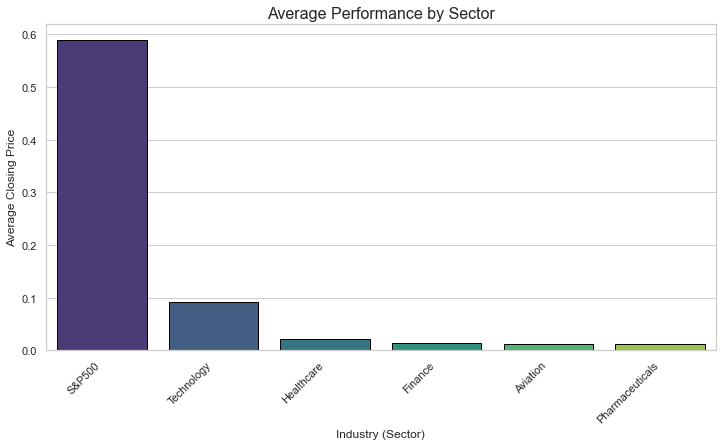

In [177]:
# Group data by Industry and calculate average closing price
sector_performance = df.groupby('Industry')['Close'].mean().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_performance.index, y=sector_performance.values, palette="viridis",ec='black')
plt.xticks(rotation=45, ha="right")
plt.title("Average Performance by Sector", fontsize=16)
plt.ylabel("Average Closing Price")
plt.xlabel("Industry (Sector)")
plt.show()


### 2. Bar Chart of Top Performing Stocks (Tickers)

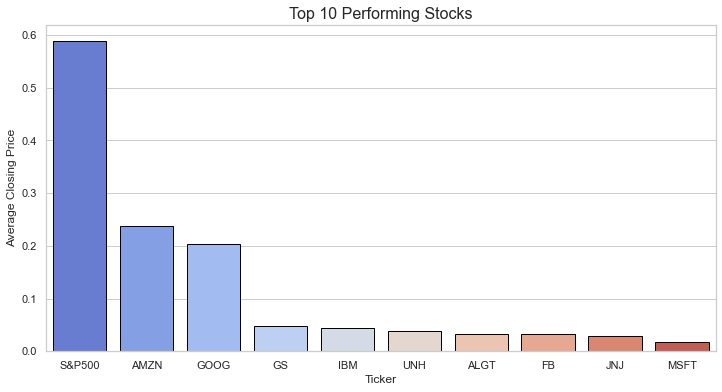

In [178]:
stock_performance = df.groupby('Ticker')['Close'].mean().sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=stock_performance.index, y=stock_performance.values, palette="coolwarm",ec='black')
plt.title("Top 10 Performing Stocks", fontsize=16)
plt.ylabel("Average Closing Price")
plt.xlabel("Ticker")
plt.show()


### 3. Scatter Plot for Stock Comparison

  Sector :  Aviation               


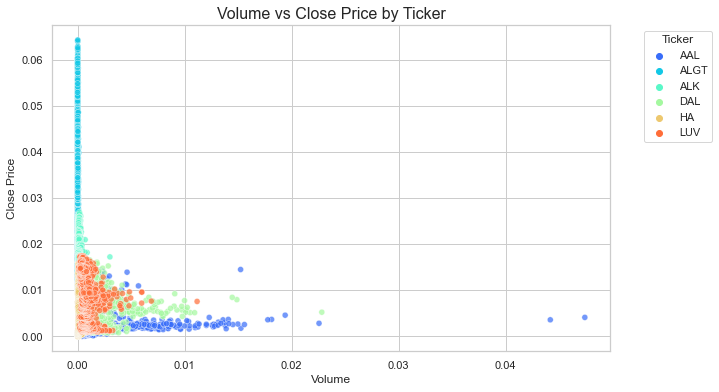

  Sector :  Finance               


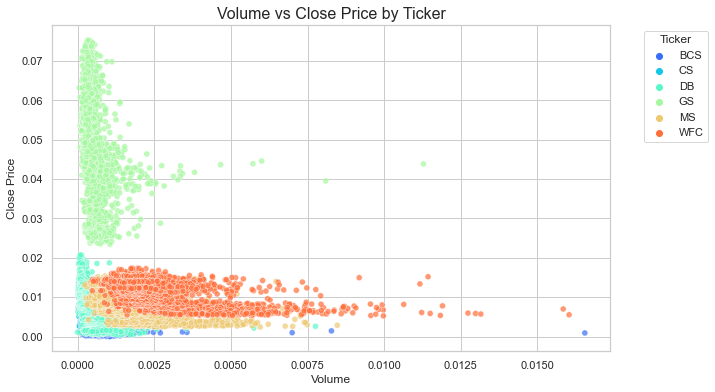

  Sector :  Healthcare               


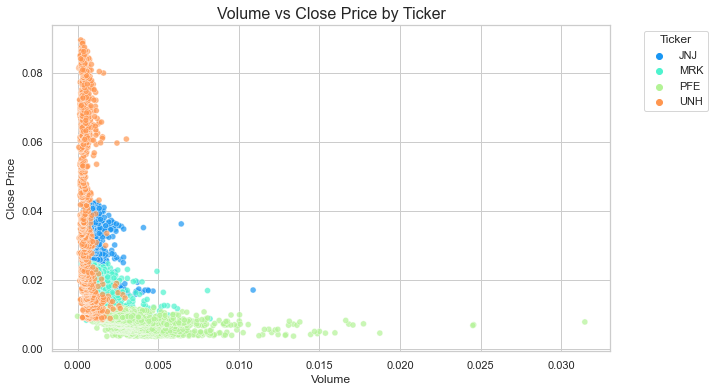

  Sector :  Pharmaceuticals               


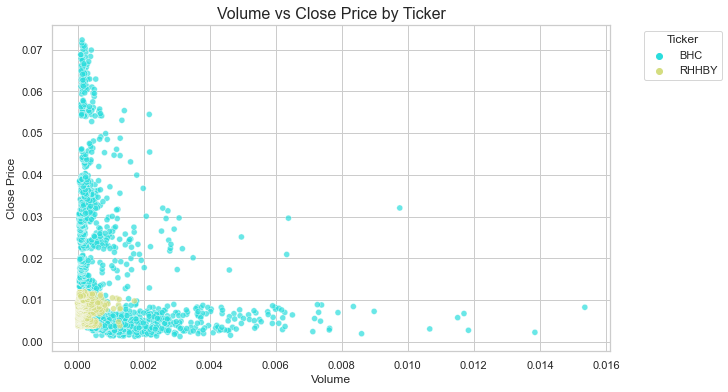

  Sector :  Technology               


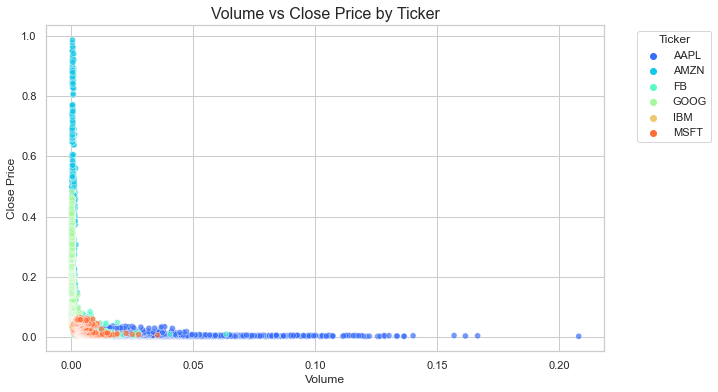

  Sector :  S&P500               


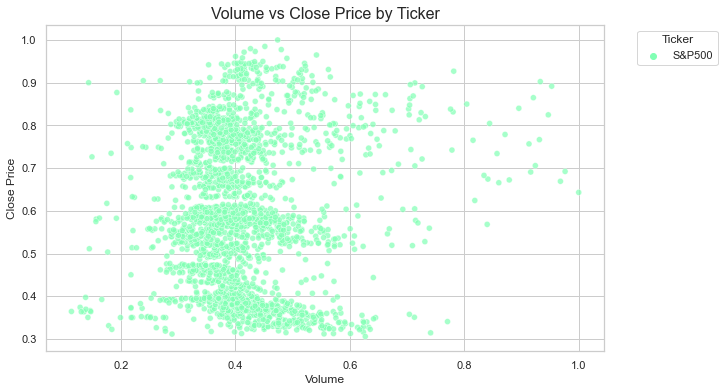

In [179]:
for i in df['Industry'].unique():
    print('  Sector : ',i,'              ')
    df_sector = df[df['Industry']==i]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data = df_sector, x='Volume', y='Close', hue='Ticker', alpha=0.7, palette="rainbow")
    plt.title("Volume vs Close Price by Ticker", fontsize=16)
    plt.xlabel("Volume")
    plt.ylabel("Close Price")
    plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
#     break

In [186]:
clean_data = stocks.copy()

In [190]:
# Convert the 'Date' column to datetime format
clean_data['Date'] = pd.to_datetime(clean_data['Date'], dayfirst=True)

# Extract the year from the date
clean_data['Year'] = clean_data['Date'].dt.year

# Display the updated DataFrame
dekho(clean_data)


(63642, 11),	['_', 'clean_data', '_188']


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,Company Name,Year
0,2010-10-01,9.29,9.39,9.21,9.29,8.758067,3603800,AAL,Aviation,American Airlines Group Inc,2010
1,2010-10-04,9.24,9.48,9.05,9.12,8.597802,3856800,AAL,Aviation,American Airlines Group Inc,2010


In [191]:
# Replace 'Na' or invalid entries with NaN
clean_data.replace('Na', np.nan, inplace=True)

# Convert the 'Date' column to datetime format
clean_data['Date'] = pd.to_datetime(clean_data['Date'], format='%d-%m-%Y')

# Extract the year
clean_data['Year'] = clean_data['Date'].dt.year

# Ensure 'Adj Close' is numeric and identify problematic values
clean_data['Adj Close'] = pd.to_numeric(clean_data['Adj Close'], errors='coerce')

# Drop rows with invalid or missing 'Adj Close' values
clean_data.dropna(subset=['Adj Close'], inplace=True)

# Calculate daily returns
clean_data['Daily_Return'] = clean_data.groupby('Ticker')['Adj Close'].pct_change()

# Drop rows with NaN in 'Daily_Return'
clean_data.dropna(subset=['Daily_Return'], inplace=True)


## 1. Standard Deviation (Volatility)
- Purpose: Measures the dispersion of returns. A higher standard deviation indicates greater risk.

In [192]:
# Calculate annualized volatility
volatility = clean_data.groupby('Ticker')['Daily_Return'].std() * np.sqrt(252)

# Display the volatility
print("Annualized Volatility:")
print(volatility)

Annualized Volatility:
Ticker
AAL       0.519460
AAPL      0.281065
ALGT      0.390170
ALK       0.374120
AMZN      0.315735
            ...   
PFE       0.199433
RHHBY     0.210723
S&P500    0.173574
UNH       0.260763
WFC       0.290634
Name: Daily_Return, Length: 25, dtype: float64


## 2. Sharpe Ratio
- Purpose: Measures the risk-adjusted return. A higher Sharpe ratio indicates better returns per unit of risk.
- Formula: Sharpe Ratio = (Average Return − Risk-Free Rate)/Standard Deviation

In [193]:
# Sharpe Ratio: Risk-adjusted return
risk_free_rate = 0.02  # Assume a 2% risk-free rate
average_daily_return = clean_data.groupby('Ticker')['Daily_Return'].mean()
sharpe_ratio = (average_daily_return - (risk_free_rate / 252)) / clean_data.groupby('Ticker')['Daily_Return'].std()

## 3. Beta (Market Risk)
- Purpose: Measures a stock's sensitivity to market movements. A beta > 1 indicates the stock is more volatile than the market.

In [195]:
# Beta: Sensitivity to market movements
market_returns = clean_data[clean_data['Ticker'] == 'S&P500'][['Date', 'Daily_Return']].dropna()
beta_values = {}

for ticker in clean_data['Ticker'].unique():
    # Get stock returns for the ticker
    stock_data = clean_data[clean_data['Ticker'] == ticker][['Date', 'Daily_Return']].dropna()
    
    # Merge with market returns to ensure matching dates
    merged_data = pd.merge(stock_data, market_returns, on='Date', suffixes=('_stock', '_market'))
    
    if len(merged_data) > 1:  # Ensure there is enough data to calculate covariance
        # Calculate covariance and variance
        covariance = np.cov(merged_data['Daily_Return_stock'], merged_data['Daily_Return_market'])[0, 1]
        market_variance = np.var(merged_data['Daily_Return_market'])
        
        # Compute beta
        beta_values[ticker] = covariance / market_variance

# Convert beta values to a DataFrame
beta = pd.Series(beta_values, name='Beta')

## 4. Cumulative return :
- Cumulative Return is the total change in the value of an investment over a specific period, expressed as a percentage of the initial value. 
- It measures the overall performance of an asset, stock, or portfolio by considering all compounding gains or losses.

In [196]:
# Compute cumulative returns over 5 years for each stock
yearly_data = clean_data.groupby(['Ticker', 'Year'])['Adj Close'].last().unstack()
yearly_returns = yearly_data.pct_change(axis=1) * 100
cumulative_returns = ((yearly_returns / 100 + 1).prod(axis=1) - 1) * 100

In [197]:
# Combine all metrics into a single DataFrame
metrics_df = pd.DataFrame({
    'Cumulative_Return': cumulative_returns,
    'Volatility': volatility,
    'Sharpe_Ratio': sharpe_ratio,
    'Beta': beta
}).dropna()

In [198]:
# Add industry information
industry_info = clean_data[['Ticker', 'Industry']].drop_duplicates()
metrics_df = metrics_df.merge(industry_info, left_index=True, right_on='Ticker')

In [200]:
# Define thresholds for selection
moderate_risk_threshold = 300  # For cumulative returns
high_volatility_threshold = 0.3  # Volatility threshold for high risk
high_sharpe_ratio = 1.0         # High Sharpe ratio indicates good risk-adjusted returns

patrick_stocks =  metrics_df[
    (metrics_df['Cumulative_Return'] < moderate_risk_threshold) &
    (metrics_df['Volatility'] < high_volatility_threshold) &
    (metrics_df['Sharpe_Ratio'] < high_sharpe_ratio)]

patrick_sectors = patrick_stocks.groupby(by=['Industry'])['Cumulative_Return'].mean().sort_values(ascending=False).reset_index()

In [201]:
# Adjusted thresholds for Peter Jyenger
moderate_risk_threshold = 150  # Include stocks with cumulative returns > 150%
high_volatility_threshold = 0.2  # Include stocks with volatility > 0.2
high_beta_threshold = 0.8       # Include stocks with beta > 0.8

# Selection criteria for Mr. Peter Jyenger (High Risk)
peter_stocks = metrics_df[
    (metrics_df['Cumulative_Return'] > moderate_risk_threshold) &
    (metrics_df['Volatility'] > high_volatility_threshold) &
    (metrics_df['Beta'] > high_beta_threshold)]

peter_sectors = peter_stocks.groupby(by=['Industry'])['Cumulative_Return'].mean().sort_values(ascending=False).reset_index()

In [202]:
# Display the results
print("Portfolio for Mr. Patrick Jyenger (Moderate Risk - Stocks):")
dekho(patrick_stocks)

print("\nPortfolio for Mr. Patrick Jyenger (Moderate Risk - Sectors):")
dekho(patrick_sectors)

print("\nPortfolio for Mr. Peter Jyenger (High Risk - Stocks):")
dekho(peter_stocks)

print("\nPortfolio for Mr. Peter Jyenger (High Risk - Sectors):")
dekho(peter_sectors)

Portfolio for Mr. Patrick Jyenger (Moderate Risk - Stocks):
(8, 6),	['patrick_stocks']


,Cumulative_Return,Volatility,Sharpe_Ratio,Beta,Ticker,Industry
23218,38.523849,0.293950,0.011118,1.301993,GS,Finance
56092,15.234862,0.223984,0.007804,0.916665,IBM,Technology



Portfolio for Mr. Patrick Jyenger (Moderate Risk - Sectors):
(5, 2),	['patrick_sectors']


,Industry,Cumulative_Return
0,Pharmaceuticals,277.195082
1,Healthcare,213.330059



Portfolio for Mr. Peter Jyenger (High Risk - Stocks):
(10, 6),	['peter_stocks']


,Cumulative_Return,Volatility,Sharpe_Ratio,Beta,Ticker,Industry
46435,1063.348660,0.281065,0.062474,1.063534,AAPL,Technology
2518,186.071811,0.390170,0.028296,1.103261,ALGT,Aviation



Portfolio for Mr. Peter Jyenger (High Risk - Sectors):
(3, 2),	['peter_sectors']


,Industry,Cumulative_Return
0,Technology,967.710336
1,Healthcare,908.610993


### Patrick's portfolio
- Patrick's portfolio highlights Amazon (AMZN) as the best-performing stock due to its exceptional growth. The Technology sector dominates, offering significant cumulative returns. This aligns with Patrick's goal of doubling his investment within  five years.

### Peter's portfolio
- Peter's portfolio focuses on high-risk stocks with the potential for greater returns. The analysis highlights volatile stocks with high standard deviation and beta values, aligning with Peter's risk profile. This strategy aims to maximize returns for his $1 million investment over five years.